In [10]:
from thinkdsp import *
import thinkplot

def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

In [11]:
def autocorr(wave):
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

490.0


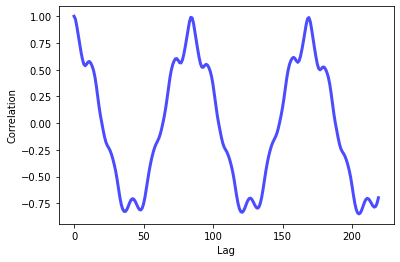

In [22]:
wave = read_wave('data/voice.wav')
segment = wave.segment(start=0, duration=0.01)
lags, corrs = autocorr(segment)
lag = np.array(corrs[90:110]).argmax() + 90
thinkplot.plot(lags, corrs , color = 'blue')
thinkplot.config(xlabel='Lag', ylabel='Correlation')
print(segment.framerate / lag)

In [23]:
def estimate_fundamental(segment , low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

525.0


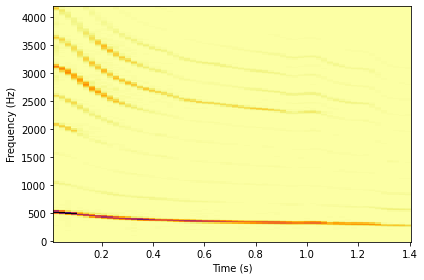

In [28]:
wave = read_wave('data/voice.wav')
wave.make_spectrogram(2048).plot(high=4200)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')
segment = wave.segment(start=0.0, duration=0.01)
frequency = estimate_fundamental(segment)
print(frequency)

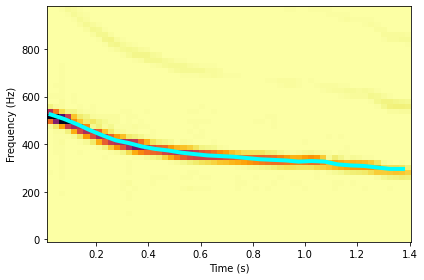

In [43]:
starts = np.arange(0.0, 1.4, 0.05)
ts = []
freqs = []
for start in starts:
    ts.append(start + 0.05/2)
    segment = wave.segment(start=start , duration=0.01)
    freq = estimate_fundamental(segment)
    freqs.append(freq)
wave.make_spectrogram(2048).plot(high=1000)
plt.plot(ts, freqs , color='aqua', linewidth=4)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

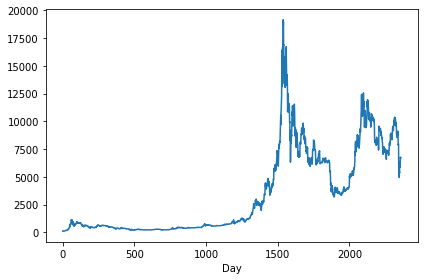

In [44]:
data = pd.read_csv('data/bitcoin.csv')
price = data['Closing Price (USD)']
count = data.index
wave = Wave(price,count,framerate=1)
wave.plot()
decorate(xlabel='Day')

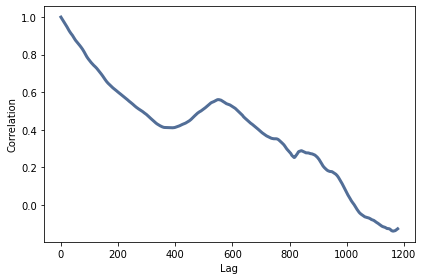

In [57]:
lags, corrs = autocorr(wave)
thinkplot.plot(lags, corrs)
decorate(xlabel='Lag', ylabel='Correlation')